# Purpose

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, body mass index (bmi), gender etc to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.


# Predicting Insurance Premiums

Our simple dataset contains a few attributes for each person such as 
Age, Sex, BMI, Children, Smoker, Region and their charges


# Aim

To use this info to predict charges for new customers



## We are going to import the data into Python

In [1]:
import numpy as np
import pandas as pd
#import os
import matplotlib.pyplot as plt
%matplotlib inline

#os.chdir() method in Python used to change the current working directory to specified path.
#os.chdir("path where you want the input file to reside")
insurance = pd.read_csv("insurance.csv")

# Preview our data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Observations: Here charges are our dependent variable, and we are going to predict it using the features (independent variables) like age, sex, bmi etc.
### We can see that there are some categorical variables like sex, smoker, region; hence we are going to create dummy variables for them.

In [2]:
# Showing the properties of different variables
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Missing values
### Observations: we don't have any missing values in the data

In [3]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Correlation
### Observations: we don't have any alarming correlation among the independent variables. We will check it once again using vif, though.

In [4]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
charges,0.299008,0.198576,0.067998,1.000000


## Univariate analysis- study how each feature is distributed graphically. you also get an idea about each individual feature characteristics.

<AxesSubplot:ylabel='Frequency'>

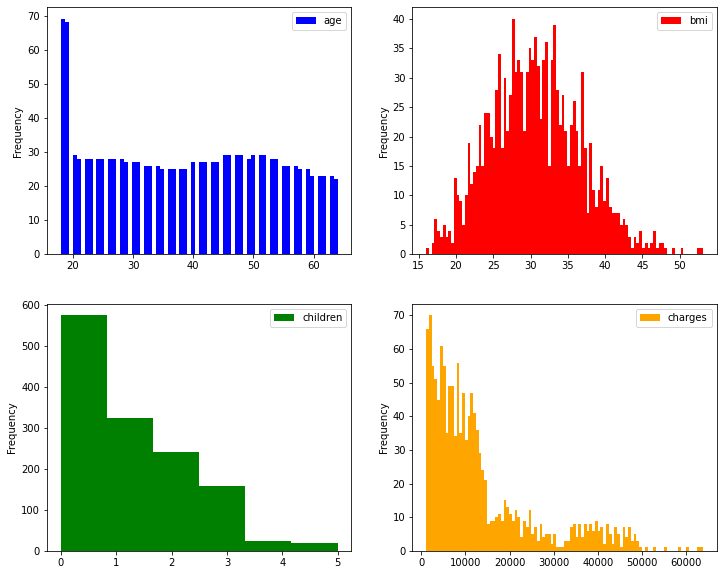

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) #width,height in figsize
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="green", ax=axes[1][0])
insurance.plot(kind="hist", y="charges", bins=100, color="orange", ax=axes[1][1])
#plt.show()

### Observations: We can see that all these variables are having variations. BMI seems to be almost a normally distributed. 


 

## Bivariate analysis

<AxesSubplot:xlabel='bmi', ylabel='charges'>

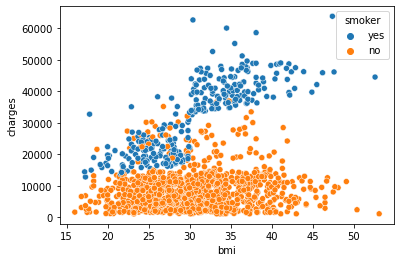

In [6]:
import seaborn as sns  # Imorting Seaborn library
sns.scatterplot(x="bmi", y="charges", data=insurance, hue='smoker')

### Observations: It's pretty clear that smokers are paying a higher premium than non-smokers. BMI doesn't seem to impacting the charges much.

## Bivariate analysis - Pair plot
### We are creating a pair plot and showing the impacts of smoker and non smokers on different variables

Text(0.5, 1.0, 'Smokers')

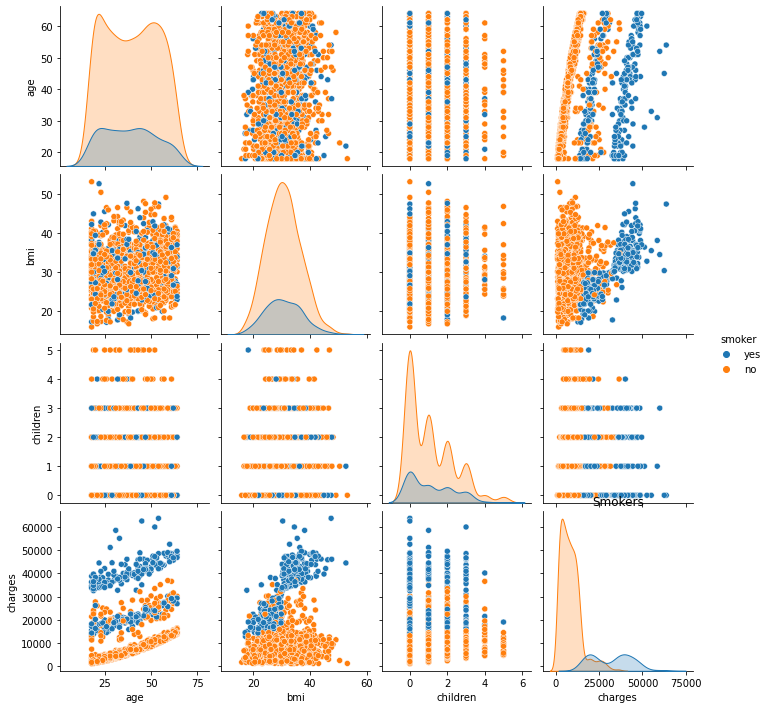

In [7]:
import seaborn as sns
sns.pairplot(insurance, hue="smoker")
plt.title("Smokers")

# Preparing Data for Machine Learning Algorithms

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Dummy Variable creation
### We can see that we have few categorical variables like sex, smoker, region. Hence we need to create dummy variables for them. The number of dummies(k-1) is 1 less than the number of categories(k)

In [9]:
insurance=pd.get_dummies(data=insurance,columns=['sex', 'smoker',"region"],drop_first=True)

## All the dummy variables have been properly created

In [10]:
insurance.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0


#  Data split
### Segregating the independent variables as X and dependent variable as y

In [11]:
#segregate data into dependent and independent variables

X = insurance.drop("charges", axis = 1)#independent variables,axis=1 ==> columns
y = insurance["charges"]#dependent variable

### Now we will split the data into training (70% of the data) and rest 30% - named test, will be kept aside for later use. 

In [12]:
# Splitting it into training and testing (70% train & 30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### We are concatenating the train and test so that we can easily use it for Linear regression. Later, we will use it (without concatenating) for SVM and Random Forest algorithms.

In [13]:
# Concatenating the training data to create a single dataset
df = pd.concat([y_train,X_train],axis=1)   #we csan achieve the same o/p by the merge function,but that would require a 
df.head()                                  #common variable(primary key)

,charges,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
332,13429.04,61,31.2,0,0,0,1,0,0
355,24603.05,46,27.6,0,1,0,0,0,1
138,27322.73,54,31.9,3,0,0,0,1,0
381,42303.69,55,30.7,0,1,1,0,0,0
292,42112.24,25,45.5,2,1,1,0,1,0


# Modeling our Data
## Linear Regression with stats model package

In [14]:
import statsmodels.formula.api as sm
rock=sm.ols(formula=
"""charges ~ age+ bmi + children + sex_male + smoker_yes + 
region_northwest + region_southeast + region_southwest""",data=df).fit()
rock.summary()# shows total summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     334.0
Date:                Tue, 16 May 2023   Prob (F-statistic):          6.37e-267
Time:                        16:28:44   Log-Likelihood:                -9492.8
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     927   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.238e+04   1210.566    -10.224      0.000   -1.48e+04      -1e+04
age                261.2825     14.435     18.101      0.000     232.954     289.611
bmi                348.9660     35.282      9.891      0.000     279.724     418.208
children           424.4107    166.968      2.542      0.011      96.732     752.090
sex_male           104.9952    404.877      0.259      0.795    -689.586     899.577
smoker_yes        2.363e+04    498.598     47.389      0.000    2.26e+04    2.46e+04
region_northwest  -486.4700    570.033     -0.853      0.394   -1605.175     632.235
region_southeast  -970.6182    579.836     -1.674      0.094   -2108.561     167.325
region_southwest  -925.0631    578.401     -1.599      0.110   -2060.190     210.063
==============================================================================
Omnibus:                      224.880   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.785
Skew:                           1.271   Prob(JB):                    8.29e-119
Kurtosis:                       5.735   Cond. No.                         312.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Remove insignificant variables (p value more than 0.05) and lowest absolute t value; one variable at a time. 

In [15]:
# Remove first sex_male followed by region_northwest
import statsmodels.formula.api as sm
rock=sm.ols(formula=
"""charges ~ age+ bmi + children  + smoker_yes + 
 region_southeast + region_southwest""", ##We can remove region_southeast + region_southwest as well.
data=insurance).fit()
rock.summary()# shows total summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        16:28:44   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.217e+04    949.526    -12.815      0.000    -1.4e+04   -1.03e+04
age                256.9892     11.889     21.616      0.000     233.666     280.312
bmi                338.7383     28.553     11.864      0.000     282.725     394.752
children           471.7334    137.651      3.427      0.001     201.696     741.771
smoker_yes        2.384e+04    411.645     57.921      0.000     2.3e+04    2.47e+04
region_southeast  -859.1326    415.199     -2.069      0.039   -1673.647     -44.618
region_southwest  -782.0894    413.737     -1.890      0.059   -1593.736      29.558
==============================================================================
Omnibus:                      300.260   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.088
Skew:                           1.212   Prob(JB):                    1.93e-156
Kurtosis:                       5.644   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Anova (Prob (F-statistic)) is less than 0.05, which ideally should be the case
### p value of region_southwest (0.059) is slightly more than 0.05, but we can safely ignore it and let the variable be in the model
### R-squared (0.751 ~ 75.1%) and Adj. R-squared (0.750 ~ 75%) are pretty high (closer to 1 better the model) and very close to each other. It shows that our independent variables can explain about 75% of the variance of dependent variable (charges)

## Now we will check for Multicollinearity
### We will use VIF to check for multicollinearity

In [16]:
var = pd.DataFrame(round(rock.pvalues,3))# shows p value
#var["coeff"] = rock.params#coefficients
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = rock.model.exog #.if I had saved data as rock
# this it would have looked like rock.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 
var["vif"] = vif
var

,0,vif
Intercept,0.000,32.860485
age,0.000,1.016194
bmi,0.000,1.104249
children,0.001,1.002828
smoker_yes,0.000,1.005742
region_southeast,0.039,1.244285
region_southwest,0.059,1.147331


### VIFs are fine since all of them are less than 2
### (Usually VIF threshold is taken as something between 2 - 3)

### Predicting the price for the test data

In [17]:
# Creating a single dataset with the testing data
df1 = pd.concat([y_test,X_test],axis=1)
#predict the test data with the model
df1["pred"] = rock.predict(X_test)   #we create a separate column called 'pred' which stores predictions
df1.head()

,charges,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,pred
764,9095.07,45,25.2,2,0,0,0,0,0,8875.833385
887,5272.18,36,30.0,0,0,0,1,0,0,7245.407627
890,29330.98,64,26.9,0,0,1,1,0,0,37233.828510
1293,9301.89,46,25.7,3,1,0,1,0,0,9773.925129
259,33750.29,19,31.9,0,1,1,1,0,0,27363.005522


In [18]:
y_test
#gives us the actual y values for x_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
701      9541.70
672      4399.73
1163     2200.83
1103    11363.28
1295     1964.78
Name: charges, Length: 402, dtype: float64

## Calculate the accuracy of the model

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(df1["charges"],df1["pred"])*100

42.15487307943329

### MAPE of 42.14% means the predicted values are 42.14% deviated from the actual values. We can assume this model has an accuracy of 100%- 42.14% = 57.86% of accuracy. This is rather poor accuracy.